In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Data Loading

In [3]:
USAhousing = pd.read_csv('datasets/USA_housing.csv')
USAhousing.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


# Data Preprocessing

In [4]:
# Feature selection

X = USAhousing[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
               'Avg. Area Number of Bedrooms', 'Area Population']]
y = USAhousing['Price']

# Split train test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('std_scalar', StandardScaler())
])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

# Modeling

In [5]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression(normalize=False)
lin_reg.fit(X_train,y_train)

LinearRegression()

In [6]:
print(lin_reg.intercept_)

1228219.1492415662


In [7]:
coeff_df = pd.DataFrame(lin_reg.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Avg. Area Income,232679.724643
Avg. Area House Age,163841.046593
Avg. Area Number of Rooms,121110.555478
Avg. Area Number of Bedrooms,2892.815119
Area Population,151252.342377


In [8]:
print(f'h(x) = {lin_reg.intercept_} + {lin_reg.coef_[0]} x {X.columns[0]} + {lin_reg.coef_[1]} x {X.columns[1]} + {lin_reg.coef_[2]} x {X.columns[2]} + {lin_reg.coef_[3]} x {X.columns[3]} + {lin_reg.coef_[4]} x {X.columns[4]}')

h(x) = 1228219.1492415662 + 232679.7246430402 x Avg. Area Income + 163841.0465928848 x Avg. Area House Age + 121110.55547763548 x Avg. Area Number of Rooms + 2892.815118949373 x Avg. Area Number of Bedrooms + 151252.34237707968 x Area Population


# Predict

In [9]:
from sklearn import metrics

train_pred = lin_reg.predict(X_train)

print('Train set evaluation:\n_____________________________________')
mae = metrics.mean_absolute_error(y_train, train_pred)
mse = metrics.mean_squared_error(y_train, train_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_train, train_pred))
r2_square = metrics.r2_score(y_train, train_pred)
print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)
print('R2 Square', r2_square)
print('__________________________________')

Train set evaluation:
_____________________________________
MAE: 81480.49973174892
MSE: 10287043161.197224
RMSE: 101425.06180031257
R2 Square 0.9192986579075526
__________________________________


In [10]:
test_pred = lin_reg.predict(X_test)

print('Test set evaluation:\n_____________________________________')
mae = metrics.mean_absolute_error(y_test, test_pred)
mse = metrics.mean_squared_error(y_test, test_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, test_pred))
r2_square = metrics.r2_score(y_test, test_pred)
print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)
print('R2 Square', r2_square)
print('__________________________________')

Test set evaluation:
_____________________________________
MAE: 81135.56609336878
MSE: 10068422551.40088
RMSE: 100341.52954485436
R2 Square 0.9146818498754016
__________________________________


In [11]:
pd.DataFrame(data=[['Linear Regression', mae, mse, rmse, r2_square]], columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])

,Model,MAE,MSE,RMSE,R2 Square
0,Linear Regression,81135.566093,1.006842e+10,100341.529545,0.914682


# Visualization

In [12]:
pred = lin_reg.predict(X_test)

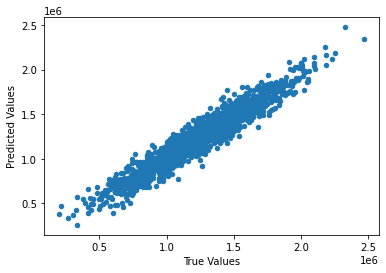

In [13]:
pd.DataFrame({'True Values': y_test, 'Predicted Values': pred}).plot(x='True Values', y='Predicted Values', kind='scatter')

# Regularization

In [14]:
from sklearn.linear_model import Ridge

lin_reg = Ridge(alpha=10.0, normalize=False)  # alpha is regularization parameter
lin_reg.fit(X_train,y_train)

train_pred = lin_reg.predict(X_train)
test_pred = lin_reg.predict(X_test)

print('Train set evaluation:\n_____________________________________')
mae = metrics.mean_absolute_error(y_train, train_pred)
mse = metrics.mean_squared_error(y_train, train_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_train, train_pred))
r2_square = metrics.r2_score(y_train, train_pred)
print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)
print('R2 Square', r2_square)
print('__________________________________')

print('Test set evaluation:\n_____________________________________')
mae = metrics.mean_absolute_error(y_test, test_pred)
mse = metrics.mean_squared_error(y_test, test_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, test_pred))
r2_square = metrics.r2_score(y_test, test_pred)
print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)
print('R2 Square', r2_square)
print('__________________________________')

Train set evaluation:
_____________________________________
MAE: 81499.8668234366
MSE: 10288057499.550646
RMSE: 101430.06210956714
R2 Square 0.9192907004736064
__________________________________
Test set evaluation:
_____________________________________
MAE: 81141.74150244863
MSE: 10068837735.856285
RMSE: 100343.59838004757
R2 Square 0.914678331670885
__________________________________
